In [1]:
import os
from snudda.simulate.network_pair_pulse_simulation import SnuddaNetworkPairPulseSimulation
n_dSPN = 5
n_iSPN = 5
n_FS = 2
n_LTS = 2
n_ChIN = 2

hold_v = -80e-3    # Holding voltage
max_dist = 100e-6  # Only look at pairs closer than this distance
GABA_rev = -60e-3  # GABA reversal potential

cur_inj = 10e-9

network_path = os.path.join("networks","pair_pulse_simulation")
volume_type="cube"
side_len = 200e-6

In [2]:
pps = SnuddaNetworkPairPulseSimulation(network_path=network_path,
                                       exp_type="Planert2010",
                                       pre_type="FS",
                                       post_type="ALL",
                                       max_dist=max_dist,
                                       hold_voltage=hold_v,
                                       current_injection = cur_inj)

Using log file networks/pair_pulse_simulation/log/pair-pulse.log
Checking depolarisation/hyperpolarisation of FS to ALL synapses


In [3]:
pps.setup(n_dSPN=n_dSPN, n_iSPN=n_iSPN,
          n_FS=n_FS, n_LTS=n_LTS, n_ChIN=n_ChIN,
          volume_type=volume_type,
          side_len=side_len)

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
Adding neurons: ChIN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002], [-0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [-0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002], [0.0001], [3.e-05]) = [1.84256218e-10]
LTS axon density P([0.0009], [-0.0001], [-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [-0.0001], [3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009], [0.0001], [-3.e-05]) = [1.72360142e-23]
LTS 

In [4]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [5]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 1/64 (16 neurons)
Processing hyper voxel : 21/64 (16 neurons)
Processing hyper voxel : 5/64 (16 neurons)
Processing hyper voxel : 4/64 (15 neurons)
Processing hyper voxel : 0/64 (14 neurons)
Processing hyper voxel : 17/64 (14 neurons)
Processing hyper voxel : 20/64 (14 neurons)
Processing hyper voxel : 16/64 (13 neurons)
Processing hyper voxel : 36/64 (3 neurons)
Processing hyper voxel : 37/64 (2 neurons)
Processing hyper voxel : 9/64 (1 neurons)
Processing hyper voxel : 18/64 (1 neurons)
Processing hyper voxel : 53/64 (1 neurons)
Processing hyper voxel : 2/64 (1 neurons)
Processing hyper voxel : 33/64 (1 neurons)
Processing hyper voxel : 34/64 (1 neurons)
Processing hyper voxel : 49/64 (1 neurons)
Processing hyper voxel : 52/64 (1 neurons)
Processing hyper voxel : 57/64 (1 neurons)


In [6]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

Read 4259 out of total 4259 synapses
Read 8 out of total 8 gapJunctions


Compile neuron modules

In [7]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks
Mod files: "../../snudda/data/neurons/mechanisms/bk_ch.mod" "../../snudda/data/neurons/mechanisms/bk_fs.mod" "../../snudda/data/neurons/mechanisms/bk_ms.mod" "../../snudda/data/neurons/mechanisms/ca_ch.mod" "../../snudda/data/neurons/mechanisms/cadyn_fs.mod" "../../snudda/data/neurons/mechanisms/cadyn_ms.mod" "../../snudda/data/neurons/mechanisms/cal12_ms.mod" "../../snudda/data/neurons/mechanisms/cal13_ms.mod" "../../snudda/data/neurons/mechanisms/cal_ch.mod" "../../snudda/data/neurons/mechanisms/caldyn_ms.mod" "../../snudda/data/neurons/mechanisms/can_fs.mod" "../../snudda/data/neurons/mechanisms/can_ms.mod" "../../snudda/data/neurons/mechanisms/cap_ch.mod" "../../snudda/data/neurons/mechanisms/caq_fs.mod" "../../snudda/data/neurons/mechanisms/caq_ms.mod" "../../snudda/data/neurons/mechanisms/car_fs.mod" "../../snudda/data/neurons/mechanisms/car_ms.mod" "../../snudda/data/neurons/mechanisms/cat32_ms.mod" "../../snudda/data/neurons/mechanisms

Translating kir2_ch.mod into /home/hjorth/HBP/Snudda/examples/notebooks/x86_64/kir2_ch.c
Translating kir_fs.mod into /home/hjorth/HBP/Snudda/examples/notebooks/x86_64/kir_fs.c
Translating kir_ms.mod into /home/hjorth/HBP/Snudda/examples/notebooks/x86_64/kir_ms.c
Thread Safe
Translating kv2_ch.mod into /home/hjorth/HBP/Snudda/examples/notebooks/x86_64/kv2_ch.c
Thread Safe
Thread Safe
 -> NMODL ../../../snudda/data/neurons/mechanisms/Kv3_ch.mod
 -> NMODL ../../../snudda/data/neurons/mechanisms/kv4_ch.mod
NEURON's CVode method ignores conservation
 -> NMODL ../../../snudda/data/neurons/mechanisms/na2_ch.mod
Thread Safe
Translating Kv3_ch.mod into /home/hjorth/HBP/Snudda/examples/notebooks/x86_64/Kv3_ch.c
 -> NMODL ../../../snudda/data/neurons/mechanisms/na3n_lts.mod
Translating kv4_ch.mod into /home/hjorth/HBP/Snudda/examples/notebooks/x86_64/kv4_ch.c
Translating na2_ch.mod into /home/hjorth/HBP/Snudda/examples/notebooks/x86_64/na2_ch.c
Thread Safe
NEURON's CVode method ignores conservati

To run in parallel instead of the cell below, run this in the ```examples/notebooks``` folder:
```
mpiexec python3 ../../snudda/simulate/network_pair_pulse_simulation.py run Planert2010 networks/pair_pulse_simulation --pre FS
```

In [ ]:
pps.run_sim(gaba_rev=GABA_rev)

Plot results

Loading 16 neurons with 225 synapses and 6 gap junctions
Loading networks/pair_pulse_simulation/simulation/network-output.hdf5
Number of pairs excluded, distance > 100.0 mum : 0
Min amp: 0.002896295212815675
Max amp: 0.012297284097845113
Mean amp: 0.006233732342007419 +/- 0.0029709480957453276
Amps: [0.0061166  0.00311585 0.00436839 0.00678399 0.00654182 0.01066698
 0.01229728 0.0028963  0.00358364 0.00596648]


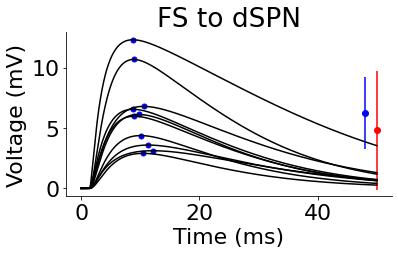

<Figure size 432x288 with 0 Axes>

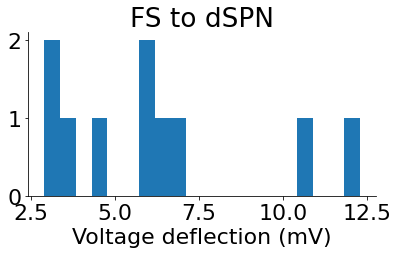

<Figure size 432x288 with 0 Axes>

In [8]:
pps.analyse(post_type="dSPN")

Loading 16 neurons with 225 synapses and 6 gap junctions
Loading networks/pair_pulse_simulation/simulation/network-output.hdf5
Number of pairs excluded, distance > 100.0 mum : 0
Min amp: 0.003708836952567643
Max amp: 0.005850512046500472
Mean amp: 0.004467423342394656 +/- 0.0008197682712046663
Amps: [0.00410674 0.0042036  0.00585051 0.00370884]


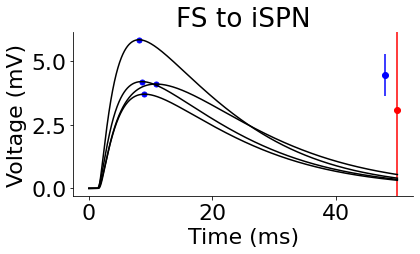

<Figure size 432x288 with 0 Axes>

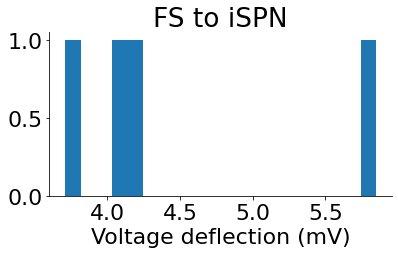

<Figure size 432x288 with 0 Axes>

In [9]:
pps.analyse(post_type="iSPN")